# Transition frequencies at high electric field
Calculating transition frequencies for spin flips in the interaction region primarily
## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use(['seaborn-darkgrid','thesis'])
import numpy as np
from scipy.linalg import eigh

from centrex_TlF_hamiltonian.states import (State, CoupledBasisState, UncoupledBasisState, generate_uncoupled_states_ground, 
                                            find_state_idx_from_state, find_closest_vector_idx, ElectronicState, find_exact_states, 
                                            reorder_evecs)
from centrex_TlF_hamiltonian.hamiltonian import generate_uncoupled_hamiltonian_X, generate_uncoupled_hamiltonian_X_function, XConstants
from centrex_TlF_hamiltonian.hamiltonian.utils import matrix_to_states, vector_to_state

## Diagonalizing Hamiltonian
We can also calculate the shifts in the energies of states by diagonalizing the Hamiltonian

### Define the X-state Hamiltonian

In [2]:
# Generate quantum numbers
QN_X_uc = generate_uncoupled_states_ground(range(0,6))

# Generate Hamiltonian as function of E and B
H_X_EB = generate_uncoupled_hamiltonian_X_function(generate_uncoupled_hamiltonian_X(QN_X_uc))

### Diagonalize hamiltonian at various electric fields

Keep track of which index corresponds to which state by reordering the eigenvectors at different electric field values

In [3]:
Emin = 100
Emax = 50e3
B = np.array([0,0, 1e-6])

# Diagonalize the Hamiltonian at minimum electric field
H_min = H_X_EB(np.array([0,0,Emin]), B)
D, V_ref_0 = np.linalg.eigh(H_min)
V_ref = V_ref_0

# Determine states at zero electric field (stored in V_ref)
for Ez in np.linspace(Emin, 0, 1000):
    H = H_X_EB(np.array([0,0,Ez]), B)
    D, V = np.linalg.eigh(H)
    _, V_ref = reorder_evecs(V, D, V_ref)

V_ref_diag = V_ref

# Determine states at large electric field (stored in V_ref)
energies = np.empty((1000, len(QN_X_uc)), dtype = float)
Ezs = np.linspace(0, Emax, len(energies))
for i, Ez in enumerate(Ezs):
    H = H_X_EB(np.array([0,0,Ez]), B)
    D, V = np.linalg.eigh(H)
    D, V_ref =  reorder_evecs(V, D, V_ref)
    energies[i,:] = D

### Plot energies for specific states
Plot the energies

In [4]:
def find_energy(approx_state):
    # Find the index of state that matches approx_state
    i = find_closest_vector_idx(approx_state.state_vector(QN_X_uc),V_ref_0)
    
    # Find energies at different electric fields
    energies_i = energies[:,i]
    
    return energies_i

def plot_energy(approx_state, ax = None):
    
    energies_i = find_energy(approx_state)
    
    if not ax:
        fig, ax = plt.subplots()
    
    ax.plot(Ezs, energies_i)
    ax.set_xlabel('Electric field magnitude / V/cm')
    ax.set_ylabel('Energy shift / Hz')
    
    return ax

def plot_transition_freq(approx_state1, approx_state2, ax=None):
    # Find the index of state that matches approx_state
    i1 = find_closest_vector_idx(approx_state1.state_vector(QN_X_uc),V_ref_0)
    i2 = find_closest_vector_idx(approx_state2.state_vector(QN_X_uc),V_ref_0)
    
    # Find energies at different electric fields
    energies1 = energies[:,i1]
    energies2 = energies[:,i2]
    
    freqs = (energies1 - energies2)/(2*np.pi*1e3)
    
    if not ax:
        fig, ax = plt.subplots()
    
    ax.plot(Ezs, freqs)
    ax.set_xlabel('Electric field magnitude / V/cm')
    ax.set_ylabel('Transition frequency / kHz')
    
    return freqs, ax

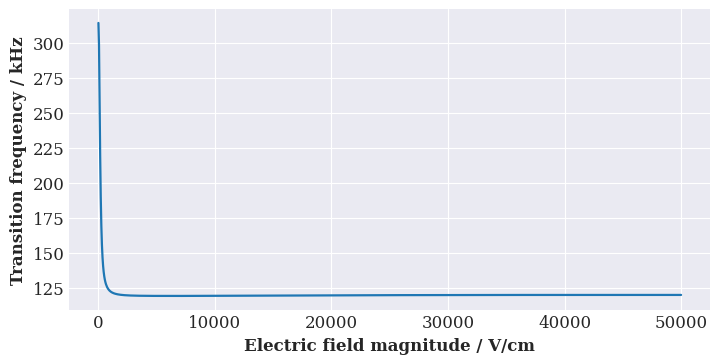

In [5]:
J2_mJ1pp = 1*UncoupledBasisState(J=2, mJ = 1, I1=1/2, m1=1/2, I2=1/2, m2=1/2, P=+1, Omega=0, electronic_state=ElectronicState.X)
J2_mJ1mp = 1*UncoupledBasisState(J=2, mJ = 1, I1=1/2, m1=-1/2, I2=1/2, m2=1/2, P=+1, Omega=0, electronic_state=ElectronicState.X)

freqs, ax = plot_transition_freq(J2_mJ1pp, J2_mJ1mp)

In [6]:
freqs[-100:]

array([120.15757534, 120.15758163, 120.15758679, 120.15759126,
       120.15759453, 120.15759696, 120.15759811, 120.15759856,
       120.15759791, 120.15759642, 120.15759373, 120.15759033,
       120.15758595, 120.15758036, 120.15757413, 120.15756676,
       120.15755859, 120.15754934, 120.15753938, 120.15752851,
       120.15751641, 120.15750358, 120.15748998, 120.15747539,
       120.15746002, 120.1574435 , 120.1574264 , 120.15740826,
       120.15738929, 120.15736965, 120.15734887, 120.15732726,
       120.15730486, 120.15728186, 120.15725757, 120.15723271,
       120.15720689, 120.15718043, 120.15715309, 120.15712503,
       120.15709601, 120.15706627, 120.15703588, 120.15700427,
       120.15697218, 120.15693919, 120.15690572, 120.15687116,
       120.15683586, 120.15679994, 120.15676327, 120.15672562,
       120.15668737, 120.15664856, 120.15660886, 120.15656835,
       120.15652717, 120.15648516, 120.15644258, 120.15639919,
       120.15635509, 120.15631051, 120.15626496, 120.15

In [19]:
i = find_closest_vector_idx(J2_mJ1pp.state_vector(QN_X_uc),V_ref_diag)

state = vector_to_state(V_ref_diag[:,i], QN_X_uc)
state_uc = state.transform_to_coupled().print_state()


+0.9998+0.0000j x |X, J = 2, F₁ = 5/2, F = 3, mF = 2, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>


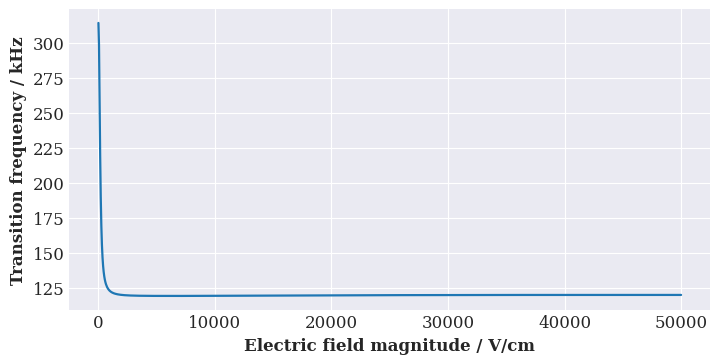

In [33]:
J1_mJ1pp = 1*UncoupledBasisState(J=1, mJ = 1, I1=1/2, m1=1/2, I2=1/2, m2=1/2, P=-1, Omega=0, electronic_state=ElectronicState.X)
J1_mJ1mp = 1*UncoupledBasisState(J=1, mJ = 1, I1=1/2, m1=-1/2, I2=1/2, m2=1/2, P=-1, Omega=0, electronic_state=ElectronicState.X)

freqs, ax = plot_transition_freq(J2_mJ1pp, J2_mJ1mp)